# DASL Challenge 3

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business. 

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sb

### Load in the dataset

In [2]:
df = pd.read_csv('foodhub-order.csv')

### Understanding the structure of the data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


In [4]:
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


### **Question 1:** How many rows and columns are present in the data?

#### **Answer 1:** The data has 1898 rows and 9 columns.

In [5]:
df.shape

(1898, 9)

### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used)

#### **Answer 2:** The datatypes of the different columns in the dataset are as follows;
       ---column name         |  datatype
       order_id                  integer
       customer_id               integer
       restaurant_name           string
       cuisine_type              string
       cost_of_the_order         float
       day_of_the_week           string
       rating                    string
       food_preparation_time     integer
       delivery_time             integer


In [6]:

df.dtypes

order_id                   int64
customer_id                int64
restaurant_name           object
cuisine_type              object
cost_of_the_order        float64
day_of_the_week           object
rating                    object
food_preparation_time      int64
delivery_time              int64
dtype: object

### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. 

#### **Answer 3:** There are no missing values in the dataset.

In [7]:
df.isnull().sum()

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? 

  ####                minimum time is 20 minutes
  ####                average time is 27 minutes
  ####                maximum time is 35 minutes

In [8]:
df.food_preparation_time.describe()

count    1898.000000
mean       27.371970
std         4.632481
min        20.000000
25%        23.000000
50%        27.000000
75%        31.000000
max        35.000000
Name: food_preparation_time, dtype: float64

### **Question 5:** How many orders are not rated?

#### There are 736 orders that are not rated.

In [9]:
df.rating.value_counts()

Not given    736
5            588
4            386
3            188
Name: rating, dtype: int64

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) 

#### Order ID
#### This column shows that it is a unique identifier (all the rows in the dataset has a unique order identification number). It also shows that 1898 transactions were made.

In [10]:
df.order_id.value_counts()

1477147    1
1477697    1
1477555    1
1478028    1
1478308    1
          ..
1478087    1
1476775    1
1478421    1
1476774    1
1478056    1
Name: order_id, Length: 1898, dtype: int64

#### Customer ID
#### An analysis of the customer identification number shows the company has 1200 customers with customer 52832, making the most transactions(13).

In [11]:
df.customer_id.value_counts()

52832     13
47440     10
83287      9
250494     8
259341     7
          ..
385426     1
254913     1
289597     1
74412      1
397537     1
Name: customer_id, Length: 1200, dtype: int64

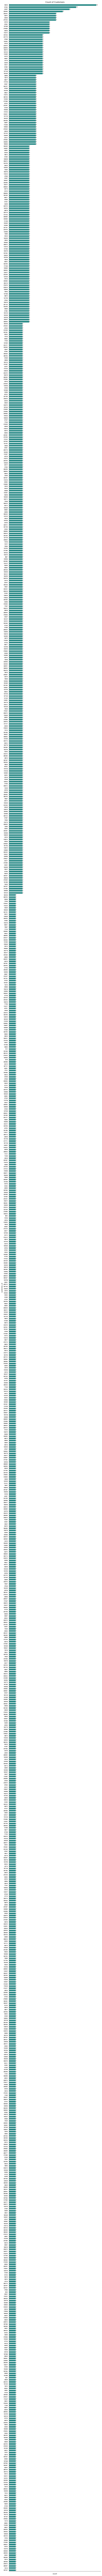

In [12]:
plt.figure(figsize =(8, 200))
sb.set_style('white')
ab = sb.countplot(data=df, y='customer_id', color='#159895', dodge=False, order=df.customer_id.value_counts().index);
ab.set_yticklabels(ab.get_yticklabels(), ha="right", fontsize=7, fontweight='heavy')
for label in ab.containers:
    ab.bar_label(label, fontsize=8)
ab.set(xticklabels=[])
ab.axes.xaxis.set_ticklabels([])
plt.tight_layout()
plt.title('Count of Customers');
sb.despine();

#### Restaurant name
#### There are a total number of 178 restuarants in the dataset with Shake Shack being the restaurant with most sales.

In [13]:
# Count the number of restaurants
df.restaurant_name.value_counts()

Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
                            ... 
Sushi Choshi                   1
Dos Caminos Soho               1
La Follia                      1
Philippe Chow                  1
'wichcraft                     1
Name: restaurant_name, Length: 178, dtype: int64

C:\Users\Acetekexpert\AppData\Local\Temp\ipykernel_11624\3605073835.py:9: UserWarning: Glyph 142 (\x8e) missing from current font.
  plt.tight_layout()
C:\Users\Acetekexpert\AppData\Local\Temp\ipykernel_11624\3605073835.py:9: UserWarning: Glyph 140 (\x8c) missing from current font.
  plt.tight_layout()
C:\Users\Acetekexpert\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 142 (\x8e) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Acetekexpert\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 140 (\x8c) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


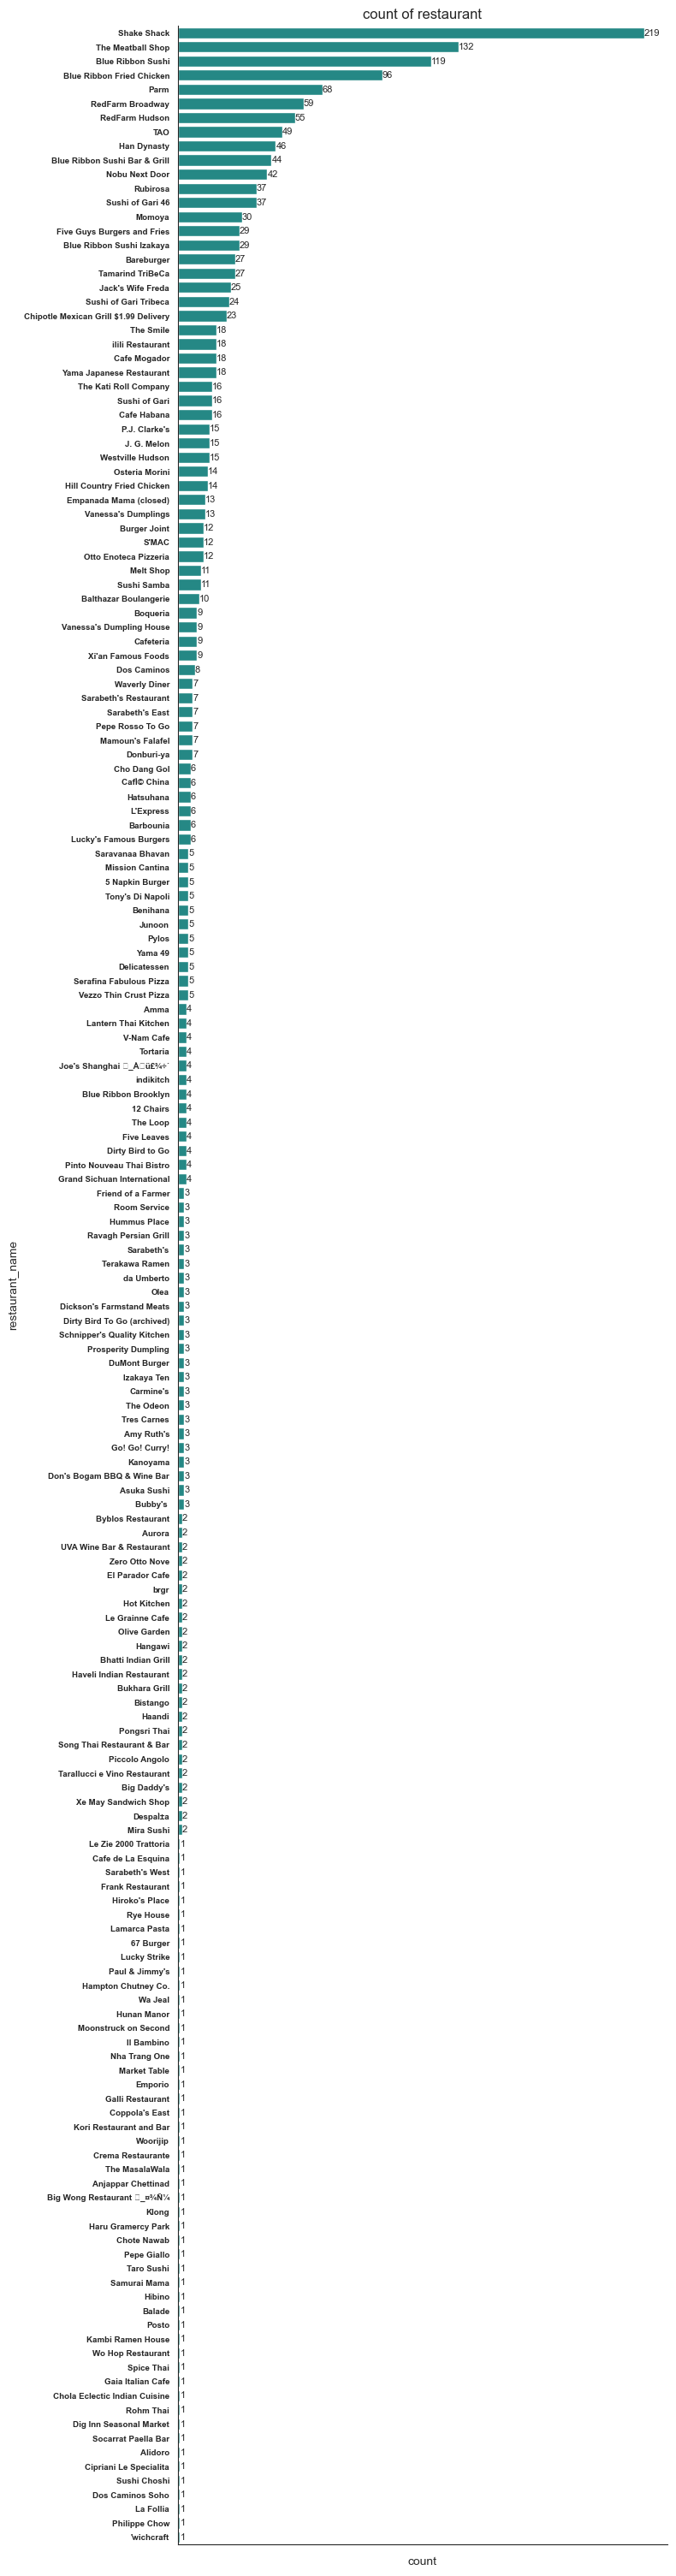

In [14]:
plt.figure(figsize =(8, 30))
sb.set_style('white')
ab = sb.countplot(data=df, y='restaurant_name', color='#159895', dodge=False, order=df.restaurant_name.value_counts().index);
ab.set_yticklabels(ab.get_yticklabels(), ha="right", fontsize=7, fontweight='heavy')
for label in ab.containers:
    ab.bar_label(label, fontsize=8)
ab.set(xticklabels=[])
ab.axes.xaxis.set_ticklabels([])
plt.tight_layout()
plt.title('count of restaurant');
sb.despine();

#### Cuisine type
#### There are fourteen (14) cuisine types in the data namely; American, Japanese, Italian, Chinese, Mexican, Indian, Middle Eastern, Mediterranean, Thai, French, Southern, Korean, Spanish, and Vietnamese. The American cuisine is the most popular cuisine while the least popular cuisine is the Vietenamese cuisine.

In [15]:
df.cuisine_type.value_counts()

American          584
Japanese          470
Italian           298
Chinese           215
Mexican            77
Indian             73
Middle Eastern     49
Mediterranean      46
Thai               19
French             18
Southern           17
Korean             13
Spanish            12
Vietnamese          7
Name: cuisine_type, dtype: int64

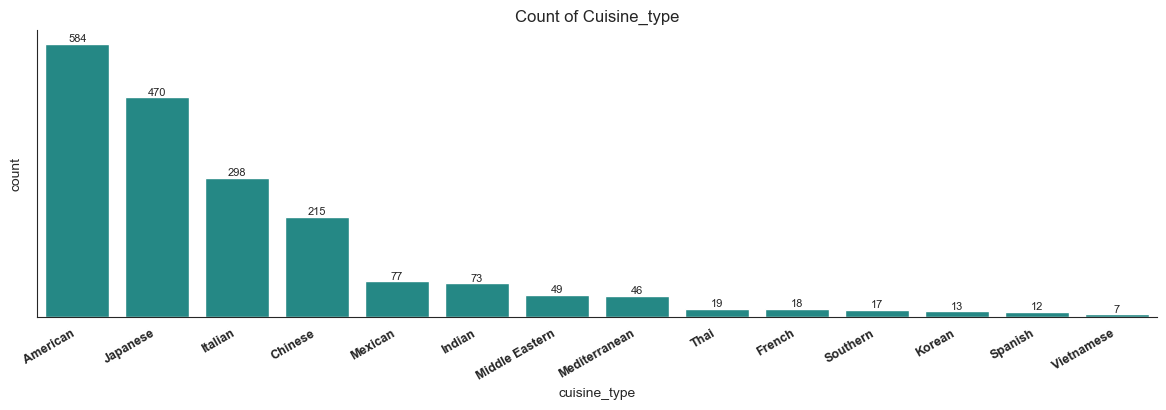

In [16]:
plt.figure(figsize =(12, 4))
sb.set_style('white')
ax = sb.countplot(data=df, x='cuisine_type', color='#159895', order=df.cuisine_type.value_counts().index);
ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha="right", fontsize=9, fontweight='heavy')
for label in ax.containers:
    ax.bar_label(label, fontsize=8)
plt.tight_layout()
ax.set(yticklabels=[])
plt.title('Count of Cuisine_type');
plt.xlabel('cuisine_type')
sb.despine()

#### Cost of the order
#### The minimum cost of order is 4.47 dollars, the average cost of order is 14.14 dollars while the maximum cost of order is 35.41 dollars. The histogram plot shows that orders costing between 10 - 15 dollars dominated.

In [17]:
df.cost_of_the_order.describe()

count    1898.000000
mean       16.498851
std         7.483812
min         4.470000
25%        12.080000
50%        14.140000
75%        22.297500
max        35.410000
Name: cost_of_the_order, dtype: float64

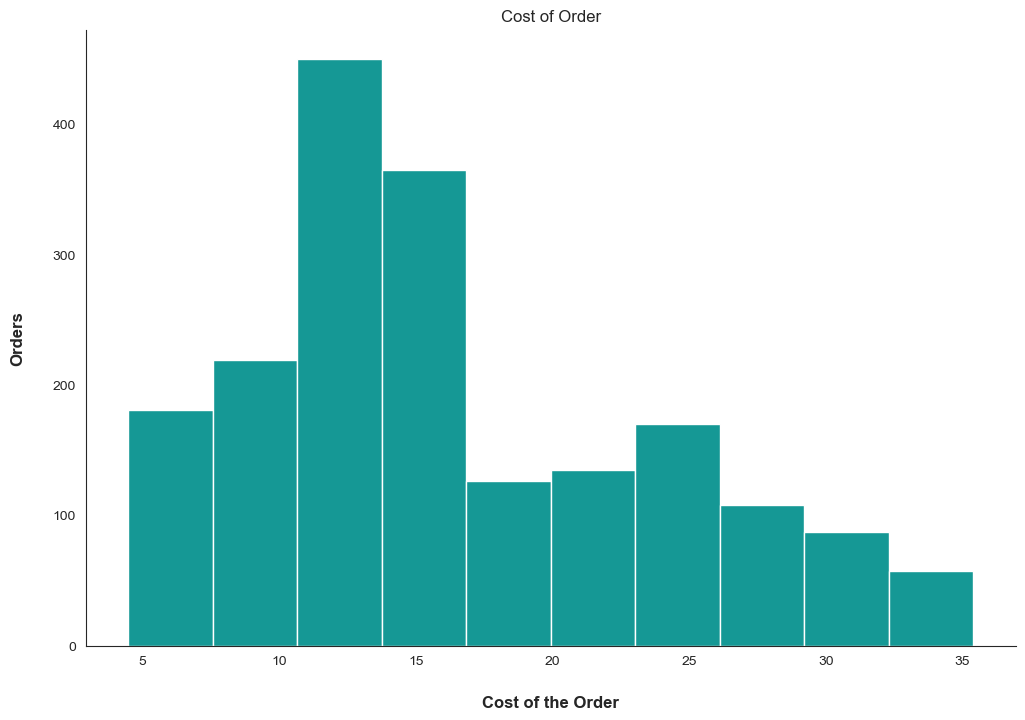

In [18]:
ax = df.hist(column = 'cost_of_the_order', bins=10, grid=False, figsize=(12,8), color='#159895', zorder=2);
ax = ax[0]
for x in ax:
    x.set_title("Cost of Order")
    x.set_ylabel("Orders", labelpad=20, weight='bold', size=12)
    x.set_xlabel("Cost of the Order", labelpad=20, weight='bold', size=12)
sb.despine()

#### Day of the week
#### T he days of the week in this dataset is categorized into 'Weekday' and 'Weekend'. The count plot shows that most orders were the placed during weekends.

In [19]:
df.day_of_the_week

0       Weekend
1       Weekend
2       Weekday
3       Weekend
4       Weekday
         ...   
1893    Weekend
1894    Weekend
1895    Weekday
1896    Weekday
1897    Weekend
Name: day_of_the_week, Length: 1898, dtype: object

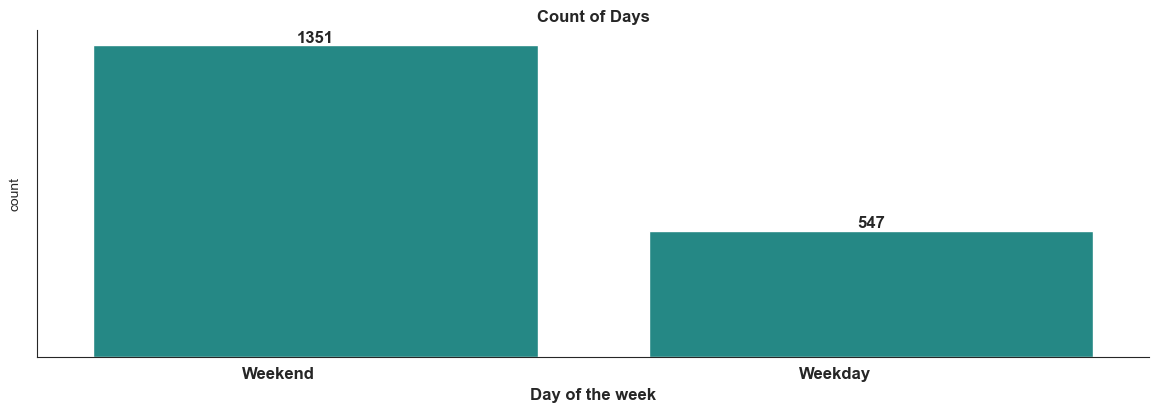

In [20]:
plt.figure(figsize =(12, 4))
sb.set_style('white')
ax = sb.countplot(data=df, x='day_of_the_week', color='#159895', order=df.day_of_the_week.value_counts().index);
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha="right", fontsize=12, fontweight='heavy')
for label in ax.containers:
    ax.bar_label(label, fontsize=12, fontweight='heavy')
plt.tight_layout()
ax.set(yticklabels=[])
plt.title('Count of Days', fontweight='heavy', fontsize=12);
plt.xlabel('Day of the week', fontsize=12, fontweight='heavy')
sb.despine();

#### Rating
#### Ratings in the dataset are categorised into four namely '5', '4', '3', and 'Not given'. This column shows that 736 orders were not rated.

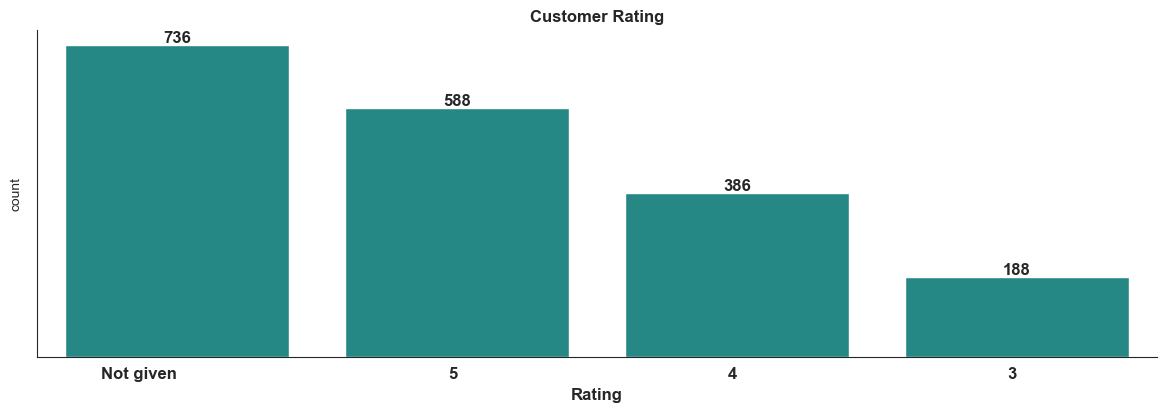

In [21]:
plt.figure(figsize =(12, 4))
sb.set_style('white')
ax = sb.countplot(data=df, x='rating', color='#159895', order=df.rating.value_counts().index);
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha="right", fontsize=12, fontweight='heavy')
for label in ax.containers:
    ax.bar_label(label, fontsize=12, fontweight='heavy')
plt.tight_layout()
ax.set(yticklabels=[])
plt.title('Customer Rating', fontsize=12, fontweight='heavy');
plt.xlabel('Rating', fontsize=12, fontweight='heavy')
sb.despine()

#### Food Preparation time
#### Most food ordered, (135) orders were prepared in 21 minutes.

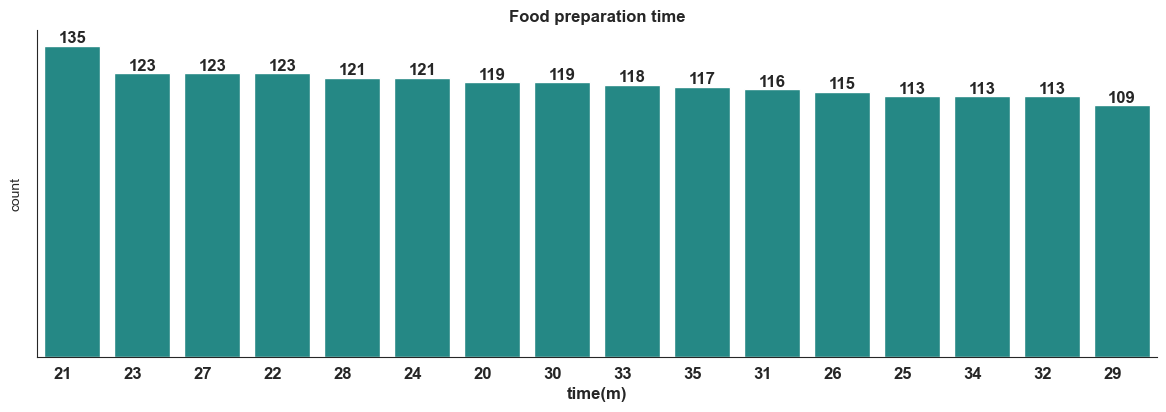

In [22]:
plt.figure(figsize =(12, 4))
sb.set_style('white')
ax = sb.countplot(data=df, x='food_preparation_time', color='#159895', order=df.food_preparation_time.value_counts().index);
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha="right", fontsize=12, fontweight='heavy')
for label in ax.containers:
    ax.bar_label(label, fontsize=12, fontweight='heavy')
plt.tight_layout()
ax.set(yticklabels=[])
plt.title('Food preparation time', fontsize=12, fontweight='heavy');
plt.xlabel('time(m)', fontsize=12, fontweight='heavy')
sb.despine()

#### Delivery time
#### Most food deliverey (162)orders were delivered in 24 minutes.

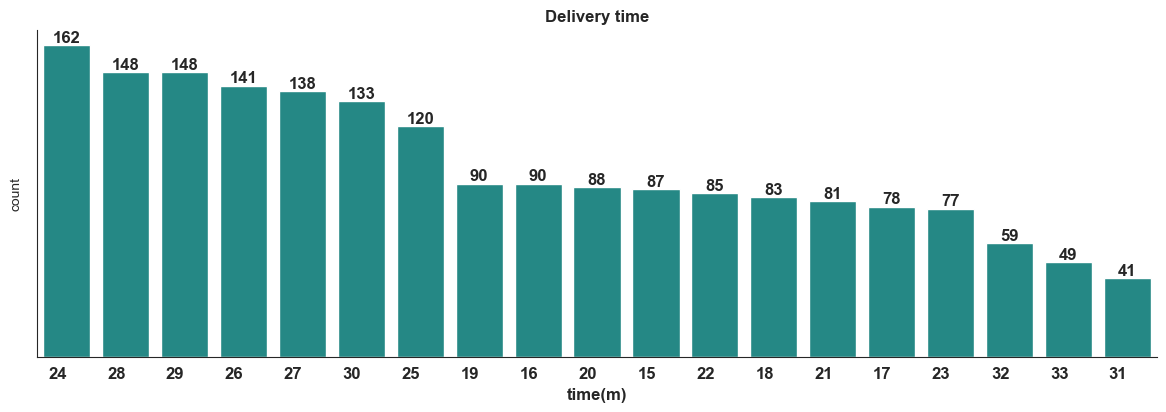

In [23]:
plt.figure(figsize =(12, 4))
sb.set_style('white')
ax = sb.countplot(data=df, x='delivery_time', color='#159895', order=df.delivery_time.value_counts().index);
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha="right", fontsize=12, fontweight='heavy')
for label in ax.containers:
    ax.bar_label(label, fontsize=12, fontweight='heavy')
plt.tight_layout()
ax.set(yticklabels=[])
plt.title('Delivery time', fontsize=12, fontweight='heavy');
plt.xlabel('time(m)', fontsize=12, fontweight='heavy')
sb.despine()

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received?
#### The top five restaurants are;
        1. Shake Shack
        2. The meatball Shop
        3. Blue Ribbon Sushi
        4. Blue Ribbon Fried Chicken
        5. Parm

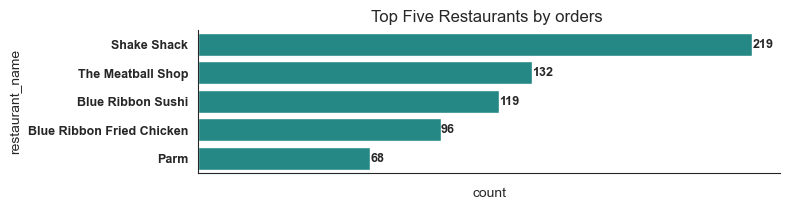

In [24]:
plt.figure(figsize =(8, 2))
sb.set_style('white')
ab = sb.countplot(data=df, y='restaurant_name', color='#159895', dodge=False, order=df.restaurant_name.value_counts().iloc[:5].index);
ab.set_yticklabels(ab.get_yticklabels(), ha="right", fontsize=9, fontweight='heavy')
for label in ab.containers:
    ab.bar_label(label, fontsize=9, fontweight='heavy')
ab.set(xticklabels=[])
ab.axes.xaxis.set_ticklabels([])
plt.tight_layout()
plt.title('Top Five Restaurants by orders ');
sb.despine();

### **Question 8**: Which is the most popular cuisine on weekends?

#### The most popular cuisine on weekends is the American Cuisine with 415 orders.

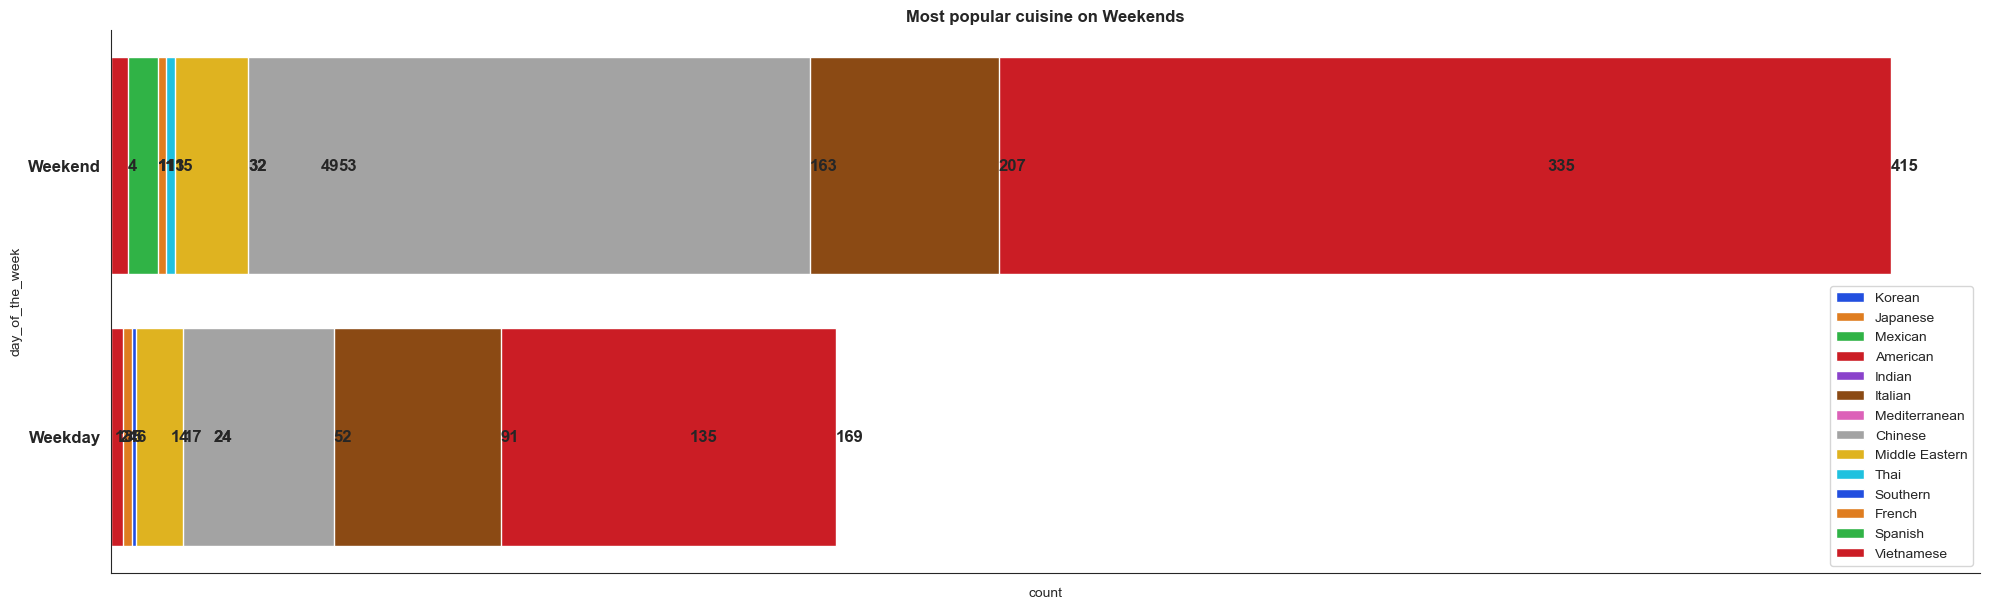

In [25]:
plt.figure(figsize =(20, 6))
sb.set_style('white')
ab = sb.countplot(data=df, y='day_of_the_week', hue='cuisine_type', 
                  palette=sb.color_palette('bright', n_colors=14),dodge=False, order=df.day_of_the_week.value_counts().iloc[:5].index);
ab.set_yticklabels(ab.get_yticklabels(), ha="right", fontsize=12, fontweight='heavy')
for label in ab.containers:
    ab.bar_label(label, fontsize=12, fontweight='heavy')
ab.set(xticklabels=[])
ab.axes.xaxis.set_ticklabels([])
ab.legend(loc='best')
plt.tight_layout()
plt.title('Most popular cuisine on Weekends', fontsize=12, fontweight='heavy');
sb.despine();

### **Question 9**: What percentage of the orders cost more than 20 dollars?
#### The percentage is 29.24

In [26]:
costs = df.cost_of_the_order
more_than_20 = [cost for cost in costs if cost>20]
# Calculate percentage
percentage_more_than_20 = len(more_than_20)/len(costs)*100
percentage_more_than_20

29.24130663856691

### **Question 10**: What is the mean order delivery time?
#### The mean order delivery time is 24.16 minutes.

In [27]:
df.delivery_time.mean()

24.161749209694417

### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed.
#### The most three frequent customers are;
        customer_id     | No of Orders
        52832                13
        47440                10
        83287                 9

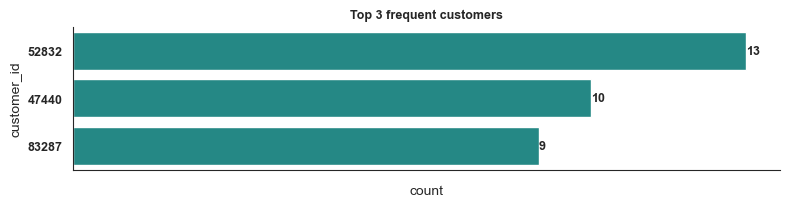

In [29]:
plt.figure(figsize =(8, 2))
sb.set_style('white')
ab = sb.countplot(data=df, y='customer_id', color='#159895', dodge=False, order=df.customer_id.value_counts().iloc[:3].index);
ab.set_yticklabels(ab.get_yticklabels(), ha="right", fontsize=9, fontweight='heavy')
for label in ab.containers:
    ab.bar_label(label, fontsize=9, fontweight='heavy')
ab.set(xticklabels=[])
ab.axes.xaxis.set_ticklabels([])
plt.tight_layout()
plt.title('Top 3 frequent customers',fontsize=9, fontweight='heavy');
sb.despine();

### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables)

#### Cuisine vs Cost of the order
#### The French cuisine is the most expensive cuisine(19.79 dollars), while the Vietnamese cuisine is the least expensive (12.88 dollars).

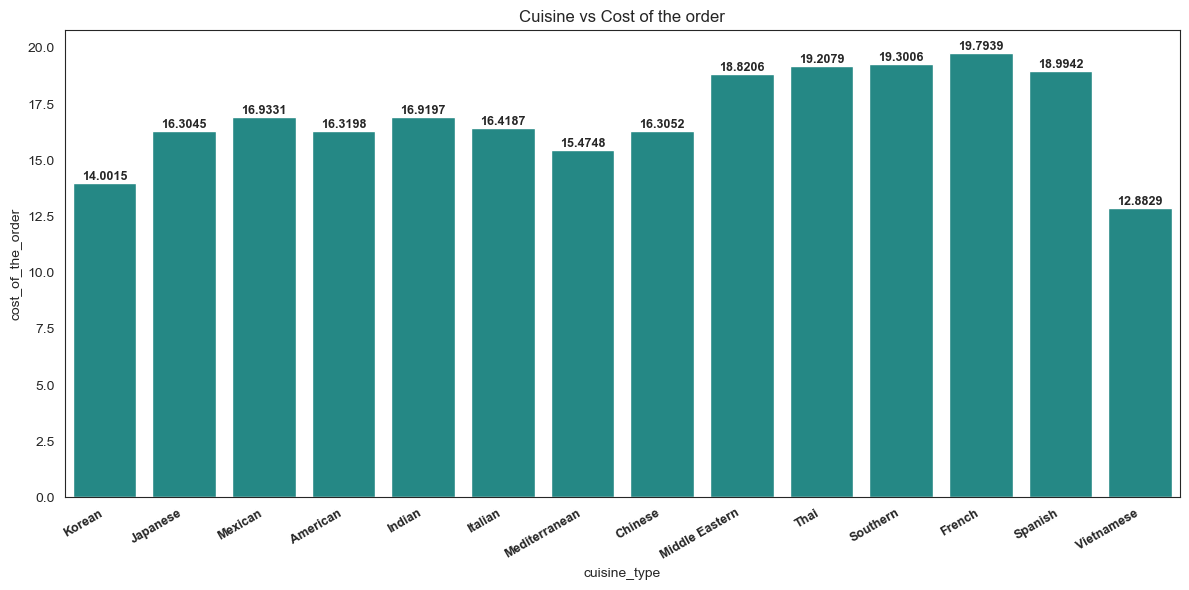

<Figure size 640x480 with 0 Axes>

In [30]:
plt.figure(figsize =(12, 6))
sb.set_style('white')
ax = sb.barplot(data=df, x='cuisine_type', y='cost_of_the_order',color='#159895', ci=None);
ax.set_xticklabels(ax.get_xticklabels(), rotation='30', ha="right", fontsize=9, fontweight='heavy')
for label in ax.containers:
    ax.bar_label(label, fontsize=9, fontweight='heavy')

plt.title('Cuisine vs Cost of the order');
plt.tight_layout()
plt.show();
sb.despine();

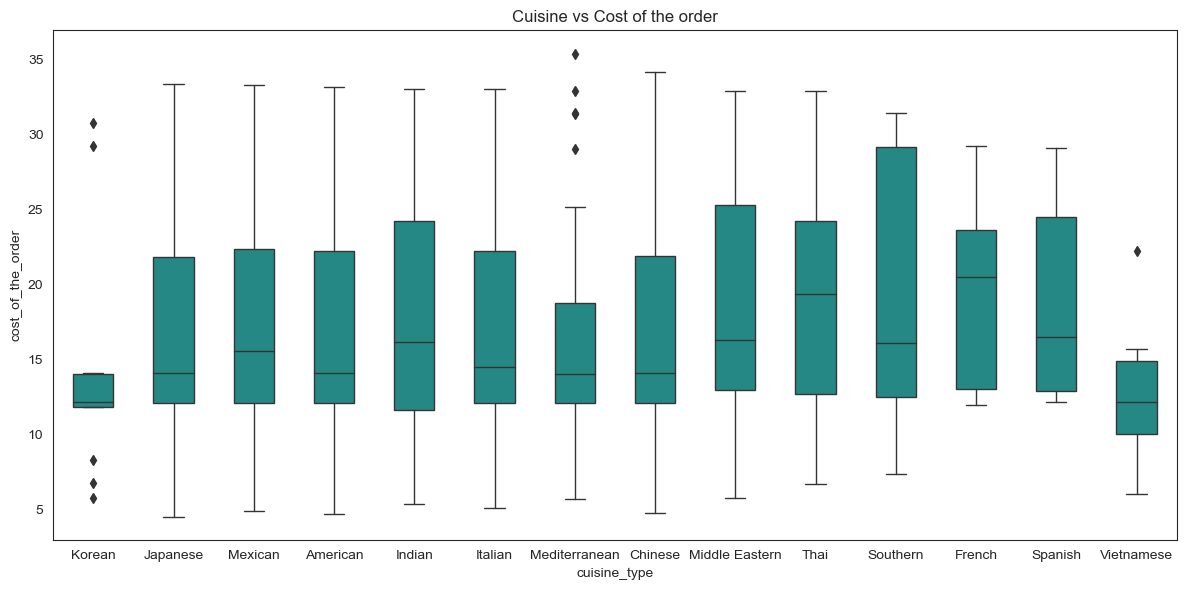

<Figure size 640x480 with 0 Axes>

In [31]:
plt.figure(figsize =(12, 6))
sb.set_style('white')
ax = sb.boxplot(data=df, x='cuisine_type', y='cost_of_the_order', width=0.5, linewidth=1, color='#159895');
plt.title('Cuisine vs Cost of the order');
plt.tight_layout()
plt.show();
sb.despine();

#### Cuisine vs Food Preparation time
#### The Korean cuisine has the shortest preparation time while the Southern cuisine has the longest preparation time.

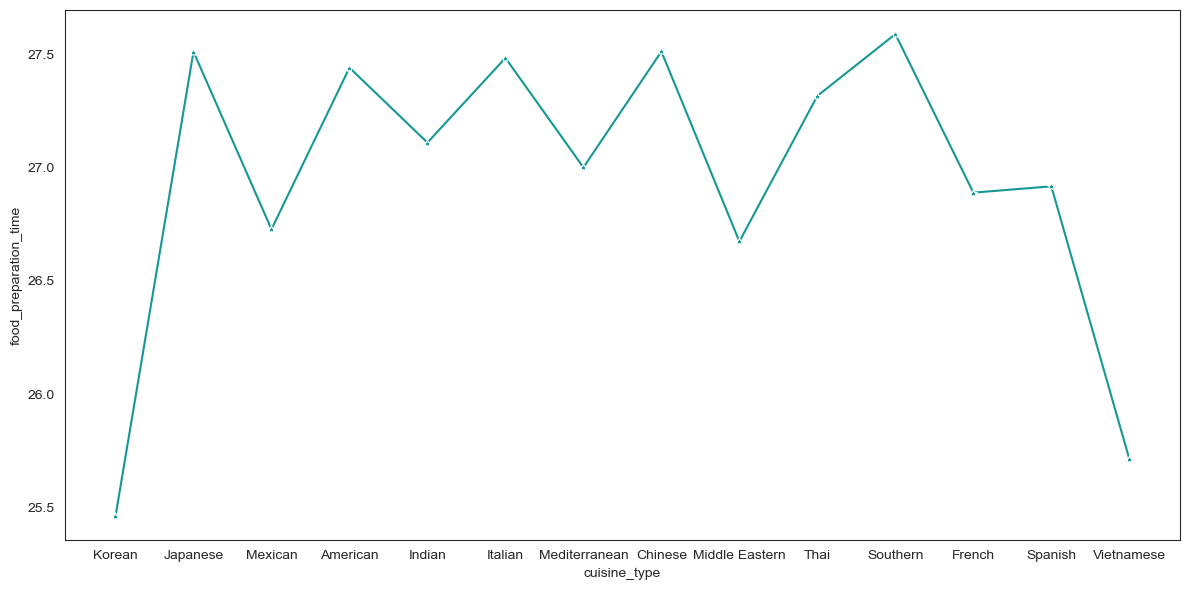

<Figure size 640x480 with 0 Axes>

In [33]:
plt.figure(figsize =(12, 6))
sb.set_style('white')
sb.lineplot(x='cuisine_type', y='food_preparation_time', data=df, color='#159895', sort = True, marker='*', ci=None);
plt.tight_layout()
plt.show();
sb.despine();

#### Day of the Week vs Delivery time
#### Delivery times during Weekends were much faster than during Weekdays.  

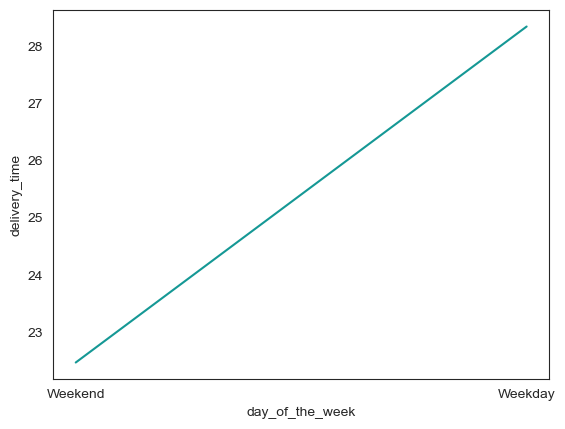

In [34]:
sb.lineplot(x='day_of_the_week', y='delivery_time', data=df, color='#159895', sort = True, ci=None);

#### Day of the Week vs Food Preparation time
#### It takes more time to prepare meals during Weekends than Weekdays.

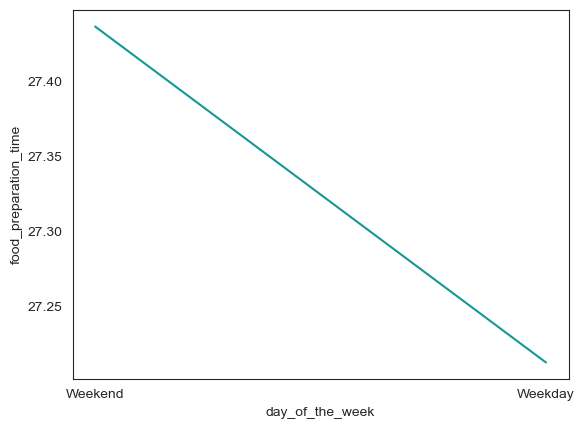

In [35]:
sb.lineplot(x='day_of_the_week', y='food_preparation_time', data=df, color='#159895', sort = True, ci=None);

#### Rating vs Delivery time
#### The shorter the delivery time, the higher the rating.

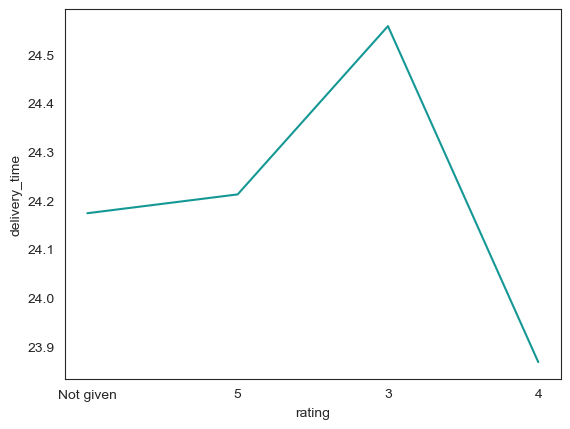

In [36]:
sb.lineplot(x='rating', y='delivery_time', data=df, color='#159895', sort = True, ci=None);

#### Rating vs Cost of the order
#### The cost of the order has some correlation with customers rating.  Orders with the rating of '5' are slightly more expensive than orders with '4', and '3' ratings.

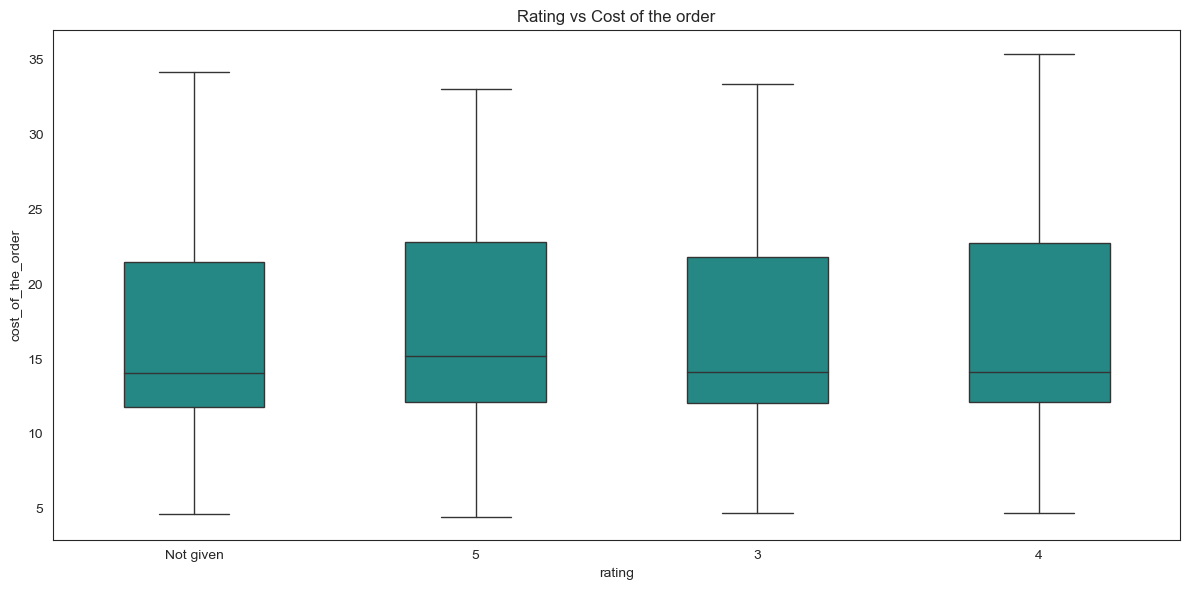

<Figure size 640x480 with 0 Axes>

In [37]:
plt.figure(figsize =(12, 6))
sb.set_style('white')
ax = sb.boxplot(data=df, x='rating', y='cost_of_the_order', width=0.5, linewidth=1, color='#159895');
plt.title('Rating vs Cost of the order');
plt.tight_layout();
plt.show();
sb.despine();

#### Correlation among variables
#### There is weak correlation between cost_of_the_order, food_preparation_time and delivery-time.

In [59]:
correlation_matrix = df.corr()
correlation_matrix

,order_id,customer_id,cost_of_the_order,food_preparation_time,delivery_time,revenue,total_time
order_id,1.000000,-0.013960,0.021171,-0.007026,0.009690,0.026334,0.002288
customer_id,-0.013960,1.000000,-0.001322,-0.030330,-0.009885,0.001096,-0.027754
cost_of_the_order,0.021171,-0.001322,1.000000,0.041527,-0.029949,0.973197,0.006358
food_preparation_time,-0.007026,-0.030330,0.041527,1.000000,0.011094,0.034643,0.685970
delivery_time,0.009690,-0.009885,-0.029949,0.011094,1.000000,-0.026292,0.735195
revenue,0.026334,0.001096,0.973197,0.034643,-0.026292,1.000000,0.004353
total_time,0.002288,-0.027754,0.006358,0.685970,0.735195,0.004353,1.000000


### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer.
#### The restuarants that meet this criteria are;
    1. Blue Ribbon Fried Chicken
    2. Blue Ribbon Sushi
    3. Parm
    4. RedFarm Broadway
    5. RedFarm Hudson
    6. Shake Shack
    7. The Meatball Shop']

In [52]:
# Find and replace 'Not given' rating score with zero
df.rating = df.rating.replace('Not given', '0');

0       0
1       0
2       5
3       3
4       4
       ..
1893    5
1894    5
1895    0
1896    5
1897    0
Name: rating, Length: 1898, dtype: object

In [54]:
# Filter restaurants with rating count > 50
filtered_restaurants = df.groupby('restaurant_name').filter(lambda x: len(x) > 50)

# Calculate the average rating for each restaurant
average_ratings = filtered_restaurants.groupby('restaurant_name')['rating'].mean()

# Extract restaurants with average rating > 4
selected_restaurants = average_ratings[average_ratings > 4]

# Print the selected restaurant names
print(selected_restaurants.index.tolist())

['Blue Ribbon Fried Chicken', 'Blue Ribbon Sushi', 'Parm', 'RedFarm Broadway', 'RedFarm Hudson', 'Shake Shack', 'The Meatball Shop']


### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders.
#### The Net Revenue generated is 6166.303 dollars

In [56]:
# Calculate revenue for each order
df['revenue'] = 0
df.loc[df['cost_of_the_order'] > 20, 'revenue'] = df['cost_of_the_order'] * 0.25
df.loc[(df['cost_of_the_order'] > 5) & (df['cost_of_the_order'] <= 20), 'revenue'] = df['cost_of_the_order'] * 0.15

# Calculate net revenue across all orders
net_revenue = df['revenue'].sum()

# Print the net revenue
print("Net Revenue: $", net_revenue)

Net Revenue: $ 6166.303


### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.)
#### Percentage of orders taking more than 60 minutes: 10.537407797681771 %

In [57]:
# Calculate total time required for each order
df['total_time'] = df['food_preparation_time'] + df['delivery_time']

# Count orders that take more than 60 minutes
num_orders_over_60_minutes = len(df[df['total_time'] > 60])

# Calculate the percentage of orders that take more than 60 minutes
percentage_over_60_minutes = (num_orders_over_60_minutes / len(df)) * 100

# Print the percentage
print("Percentage of orders taking more than 60 minutes:", percentage_over_60_minutes, "%")


Percentage of orders taking more than 60 minutes: 10.537407797681771 %


### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends?
#### Delivery time is shorter during the weekends.
Mean Delivery Time on Weekdays:
28.340036563071298

Mean Delivery Time on Weekends:
22.4700222057735

In [58]:
# Convert 'day_of_the_week' to a categorical variable for proper ordering
df['day_of_the_week'] = pd.Categorical(df['day_of_the_week'], categories=['Weekend', 'Weekday'], ordered=True)

# Group the data by 'day_of_the_week' and calculate mean delivery time
mean_delivery_time = df.groupby('day_of_the_week')['delivery_time'].mean()

# Print the mean delivery time for weekdays and weekends
print("Mean Delivery Time on Weekdays:")
print(mean_delivery_time.loc['Weekday'])  # Subset for weekdays
print("\nMean Delivery Time on Weekends:")
print(mean_delivery_time.loc['Weekend'])  # Subset for weekends

Mean Delivery Time on Weekdays:
28.340036563071298

Mean Delivery Time on Weekends:
22.4700222057735


### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.)

### Conclusion
 The following were discovered from the analysis of the dataset;
1. The data has 1898 rows and 9 columns and has no missing values.

2. A total number of 1898 transactions were made.

3. An analysis of the customer identification number shows the company has 1200 customers, with customer 52832, making the most transactions(13). The three most frequent customers are 52832 with 13 orders, 47440 with 10 orders and 83287 with 9 orders.

4. There are a total number of 178 restuarants in the dataset with Shake Shack being the restaurant with most sales.

5. There are fourteen (14) cuisine types in the data namely; American, Japanese, Italian, Chinese, Mexican, Indian, Middle Eastern, Mediterranean, Thai, French, Southern, Korean, Spanish, and Vietnamese. The American cuisine is the most popular cuisine while the least popular cuisine is the Vietenamese cuisine. The French cuisine is the most expensive cuisine(19.79 dollars), while the Vietnamese cuisine is the least expensive (12.88 dollars).

6. The most popular cuisine on weekends is the American Cuisine with 415 orders.

7. The days of the week in this dataset is categorized into 'Weekday' and 'Weekend'. The count plot shows that most orders were the placed during the weekends.

8. It takes the a minimum time of 20 minutes, an average time of 27 minutes, and a maximum time of 35 minutes for food to be prepared. 

9. Most of the food delivery(162 deliveries) were delivered in 24 minutes.

10. The minimum cost of order is 4.47 dollars, the average cost of order is 14.14 dollars while the maximum cost of order is 35.41 dollars. The histogram plot shows that orders costing between 10 - 15 dollars enjoyed more patronage.

11. The cost of the order has some correlation with customers rating.  Orders with the rating of '5' are slightly more expensive than orders with '4', and '3' ratings.

14. Delivery time is shorter during the weekends. The mean delivery time on weekdays is 28.340036563071298 minutes and the mean delivery time on weekends is 22.4700222057735 minutes.


### Recommendations
1. Percentage of orders taking more than 60 minutes is 10.5%. There is still room for improvement in reducing the total time needed for food preparation and delivery to customers.

2. The Mexican, Indian, Middle Eastern, Mediterranean,Thai,French, Southern, Korean, Spanish, Vietnamese cuisines should be improved upon and made more attractive for increased patronage.

3. The American, Japanese, Italian, Chinese cuisines bring in most of the revenue. More marketing and branding should go into these cuisines.

4. Delivery time during weekdays should be reduced in order to increase the revenue generated during weekdays.